In [1]:
%run ../datuslib.ipynb

#ROBADO DE LAS NOTE DE CLASES
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
from wordcloud import WordCloud


In [2]:
#CARGO DATASET

C_tweets = pd.read_csv("../Data/train.csv")
C_CantTweetsEnDf=len(C_tweets.index)

In [13]:
def list2text(list):
    text=""
    for w in list:
        text+=str(w)
        text+=" "
    text=text[:-1]    
    return text

In [28]:
# Quito "separador" %20 entre keywords, es solo un espacio.
# Por ejemplo, en uno decia natutal%20disaster, lo que seria "natural disater"(toda la frase es la keyword)
# No natural y disaster( por separado, dos key distintas )
C_tweets['keyword'] = C_tweets['keyword'].str.replace('%',' ')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('2','')
C_tweets['keyword'] = C_tweets['keyword'].str.replace('0','')

In [29]:
C_tweets.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane-accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew-up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown-up', 'body-bag', 'body-bagging', 'body-bags',
       'bomb', 'bombed', 'bombing', 'bridge-collapse',
       'buildings-burning', 'buildings-on-fire', 'burned', 'burning',
       'burning-buildings', 'bush-fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical-emergency', 'cliff-fall',
       'collapse', 'collapsed', 'collide', 'collided', 'collision',
       'crash', 'crashed', 'crush', 'crushed', 'curfew', 'cyclone',
       'damage', 'danger', 'dead', 'death', 'deaths', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailment', 'desol

### Wordcloud en Keywords

No muestra en si cual keyword es mas frecuente(el cual seria NaN), si no la palabra de las keywords mas frecuente. Al parecer es "emergency" o "fire", ya que varias keywords contienen esta palabra en si misma. 
Como por ejemplo: 

para emergency --> (chemical-emergency, emergency, emergency-plan, emergency-services, radiation-emergency)

para fire --> (fire, fire-truck, forest-fire, wildfire)

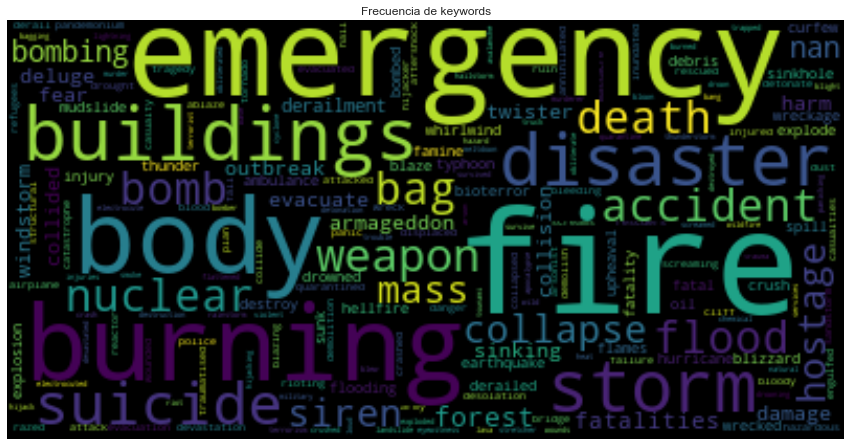

In [30]:
plt.rcParams['figure.figsize'] = (15, 15)
text=list2text(C_tweets.keyword.tolist())
#wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
wordcloud = WordCloud(collocations=False).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Frecuencia de keywords")
plt.show()

In [272]:
#Cambio NaN por Nothing en Keyword
C_tweets['keyword'] = C_tweets['keyword'].fillna('Nothing') 

## Keyword en Texto

In [273]:
def keyword_in_text(df):
    """
    RECIBE: un df
    DEVUELVE: el mismo df con una columna que indica si la keyword esta en el tweet.
    """
    
    df['contains_keyword'] = 0
    cant_filas = len(df.index)
    for y in range(cant_filas):
        df['contains_keyword'][y:]= df.iloc[y][1].lower() in df.iloc[y][3].lower()

In [274]:
keyword_in_text(C_tweets)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [275]:
C_in_text = C_tweets.groupby(["contains_keyword"]).agg({'keyword':'count'}).reset_index().rename(columns={"keyword": "cantidad"})
C_in_text["Porcentaje"] = C_in_text["cantidad"]/C_in_text["cantidad"].sum() * 100 #Porcentaje del total de tweets

C_in_text

,contains_keyword,cantidad,Porcentaje
0,False,913,11.992644
1,True,6700,88.007356


Text(0, 0.5, 'Texto contiene a Keyword')

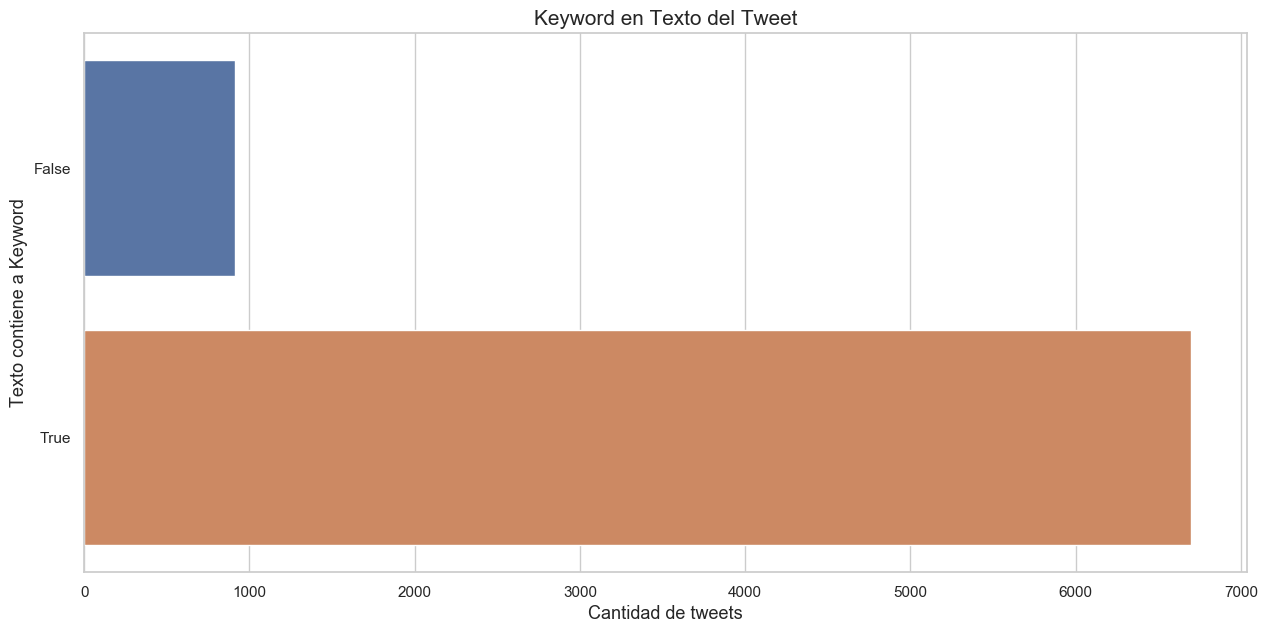

In [276]:
## Agregar un grafico, si es posible no de barplot --> No fue posible(Cristian del futuro)
#Area del plot
plt.rcParams['figure.figsize'] = (15, 7)

g = sns.barplot(y =C_in_text["contains_keyword"] , x=C_in_text["cantidad"] , orient='h',)
g.set_title("Keyword en Texto del Tweet", fontsize=15)
g.set_xlabel("Cantidad de tweets", fontsize=13,)
g.set_ylabel("Texto contiene a Keyword", fontsize=13)

### Conclusion
Como conclusion, en 900 de las 7613 (el 12% del total) tweets el keyword no esta en el texto y los restantes
6700 (88% del total) contiene en alguna parte del texto a la keyword.

## Distintos keyword

In [277]:
C_tweets.head(5)

,id,keyword,location,text,target,contains_keyword
0,1,Nothing,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,Nothing,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,Nothing,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,Nothing,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,Nothing,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False


In [278]:
#Veo Distintos Keyword
C_keyword = C_tweets['keyword'].unique()

In [279]:
#Agrupo por keyword  y cuenta las ocurrencias de cada uno
C_grouped = C_tweets.groupby(['keyword'])\
.agg({'id':'count',"target":"sum"}) #Como desatre = target 1 --> solo sumo la cantidad de desastres
C_grouped = C_grouped.rename(columns={"id": "cantidad","target":"Cant Disaster"})
C_grouped["% Disaster"]=C_grouped["Cant Disaster"] / C_grouped["cantidad"] * 100 

In [280]:
C_grouped.reset_index(inplace=True)

In [281]:
C_grouped

,keyword,cantidad,Cant Disaster,% Disaster
0,Nothing,61,42,68.852459
1,ablaze,36,13,36.111111
2,accident,35,24,68.571429
3,aftershock,34,0,0.000000
4,airplane accident,35,30,85.714286
...,...,...,...,...
217,wounded,37,26,70.270270
218,wounds,33,10,30.303030
219,wreck,37,7,18.918919
220,wreckage,39,39,100.000000


In [282]:
#Chequeo
print ("Suma de tweets por keyword:", C_grouped.cantidad.sum(), " = ","Cantidad de filas en df:" , len(C_tweets.index))

Suma de tweets por keyword: 7613  =  Cantidad de filas en df: 7613


Text(0.5, 1.0, 'Distribucion de la Frecuencia de keywords en el set')

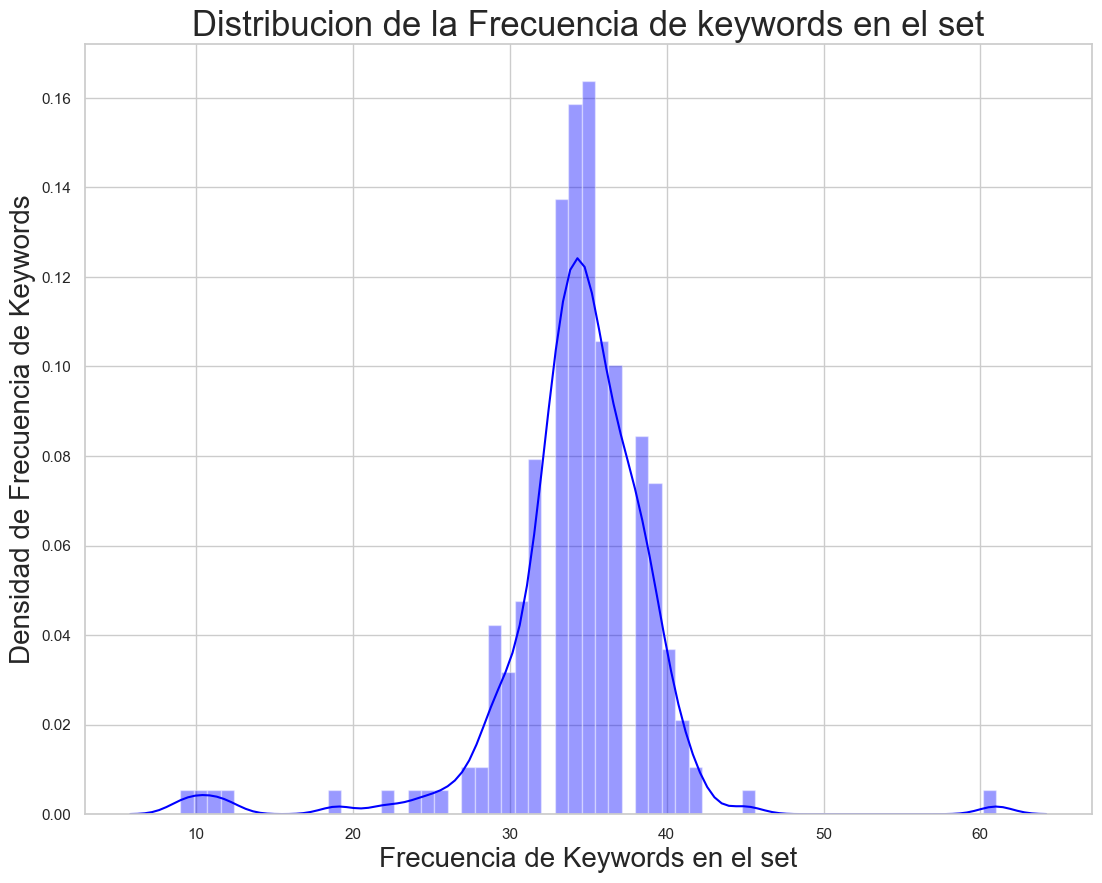

In [283]:
plt.rcParams['figure.figsize'] = (13, 10)
g = sns.distplot(C_grouped["cantidad"],bins=int(C_grouped["cantidad"].max()),color='blue')
g.set_ylabel('Densidad de Frecuencia de Keywords', fontsize=20)
g.set_xlabel('Frecuencia de Keywords en el set', fontsize=20)
g.set_title("Distribucion de la Frecuencia de keywords en el set", fontsize=25)

### Las frecuencias de las keywords en el set se concentran en los valores de 30 a 40 en seu mayoria con un pico en los valores intermedios a estos limites

### TOP 10 KEYWORDS MAS USADOS

In [284]:
C_keyword_sort_by_frec =  C_grouped.sort_values(by='cantidad', ascending=False)

In [285]:
TOP_10_mas =C_keyword_sort_by_frec.head(10)

Text(0.5, 1.0, 'TOP 10 Keywords menos usados')

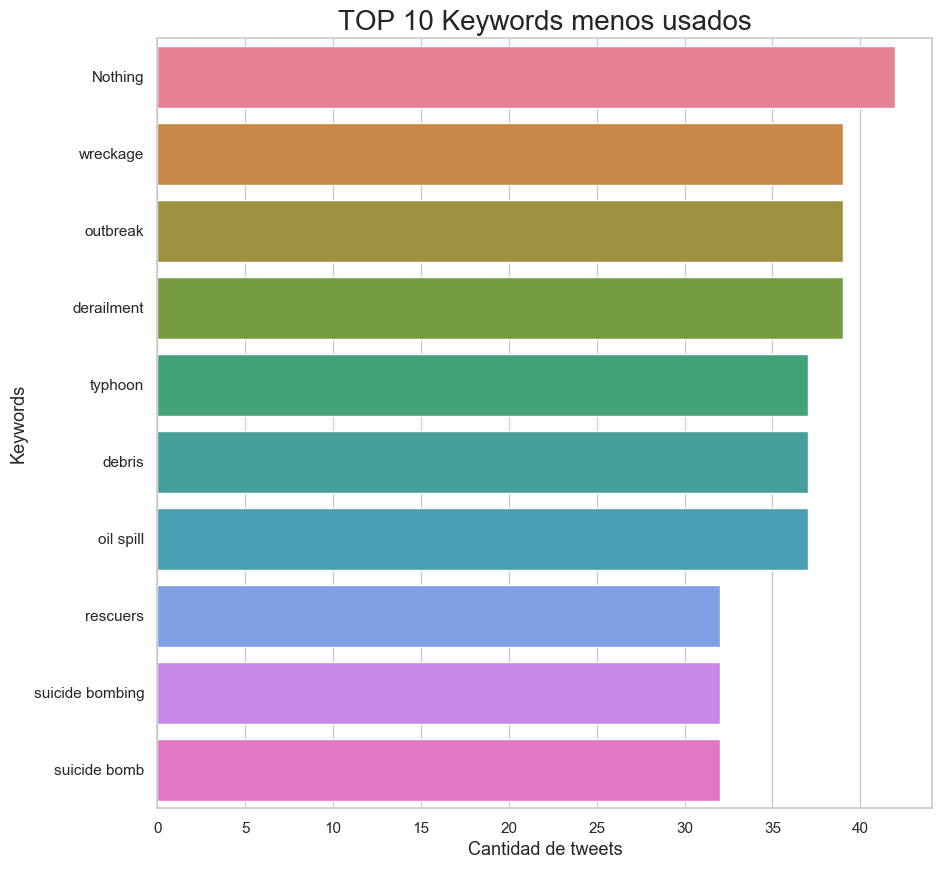

In [307]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=TOP_10_mas["cantidad"] , y=TOP_10_mas["keyword"] , orient='h',palette='husl')
g.set_xlabel("Cantidad de tweets", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("TOP 10 Keywords mas usados", fontsize=20)

#### El Keyword mas usado es Nothing, que seria NaN, ya que antes remplace los nans por Nothing como categoria.
#### Aunque solo replesenta un 0.8%(61 / 7613) del total de tweets.

### TOP 10 KEYWORDS MENOS USADOS

In [308]:
TOP_10_menos=C_keyword_sort_by_frec.tail(10) 

Text(0.5, 1.0, 'TOP 10 Keywords menos usados')

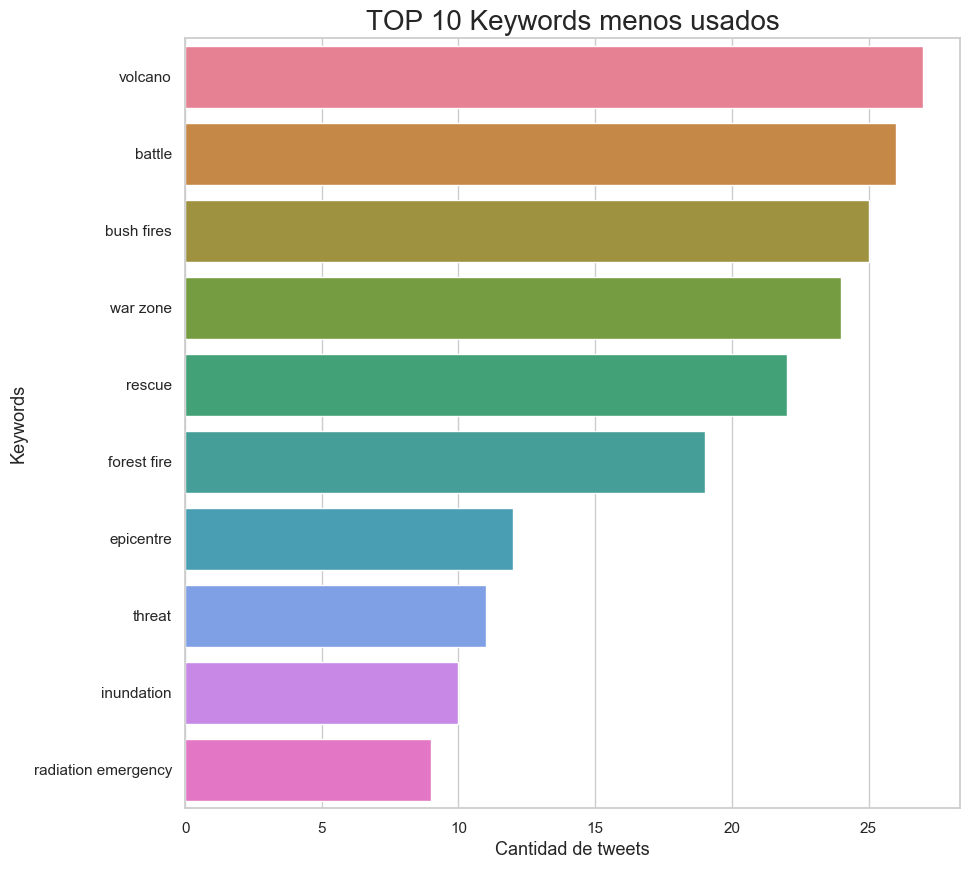

In [309]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=TOP_10_menos["cantidad"] , y=TOP_10_menos["keyword"] , orient='h',palette='husl')
g.set_xlabel("Cantidad de tweets", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("TOP 10 Keywords menos usados", fontsize=20)

#### Afinando un poco mas la busqueda y quedandome solo con los keywords mas y menos usados, pero que sea desatres comprobables (target 1)

### TOP 10 KEYWORD MAS USADOS CON DESASTRES

In [310]:
C_only_disaster=C_tweets[C_tweets["target"]==1]

In [311]:
C_only_disaster = C_only_disaster.groupby(['keyword'])\
.agg({'target':'count'}) #Como desatre = target 1 --> solo sumo la cantidad de desastres
C_only_disaster = C_only_disaster.rename(columns={"target": "cantidad"})
C_only_disaster.reset_index(inplace=True)


In [312]:
C_keywordDis_sort_by_frec =  C_only_disaster.sort_values(by='cantidad', ascending=False)

In [313]:
TOP_10_mas =C_keywordDis_sort_by_frec.head(10)

Text(0.5, 1.0, 'TOP 10 Keywords mas usados')

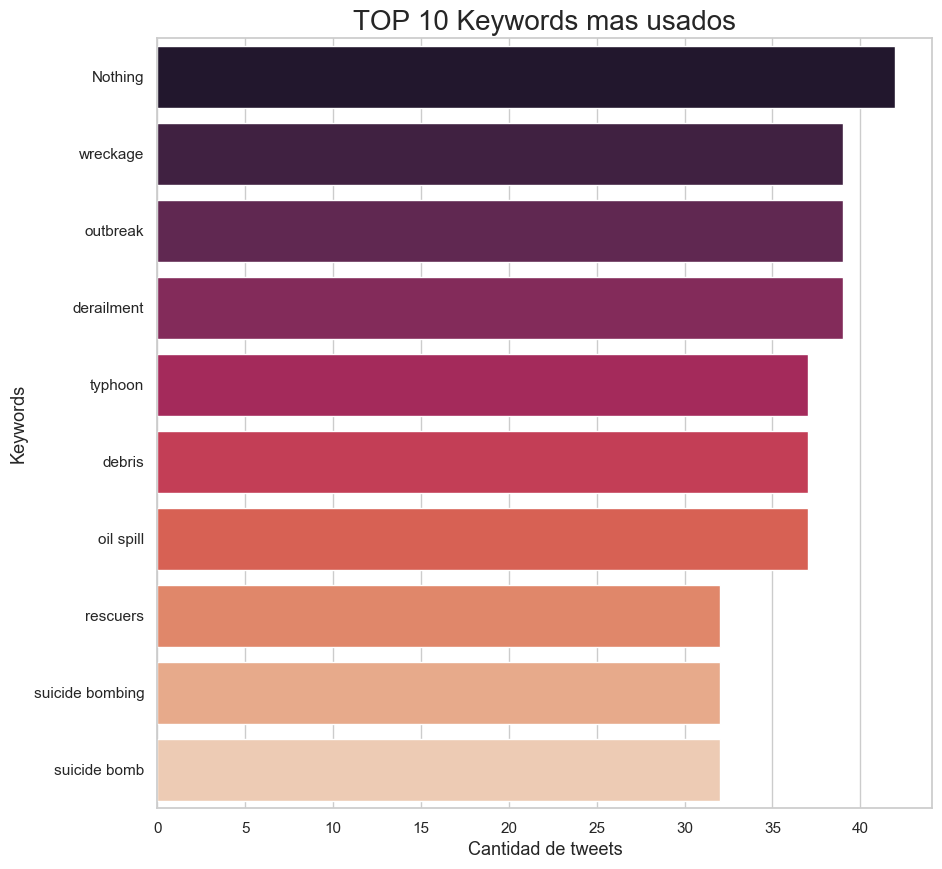

In [314]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=TOP_10_mas["cantidad"] , y=TOP_10_mas["keyword"] , orient='h',palette="rocket")
g.set_xlabel("Cantidad de tweets", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("TOP 10 Keywords mas usados", fontsize=20)

  ### TOP 10 KEYWORD MENOS USADOS CON DESASTRES

In [315]:
TOP_10_menos =C_keywordDis_sort_by_frec.tail(10)

Text(0.5, 1.0, 'TOP 10 Keywords menos usados')

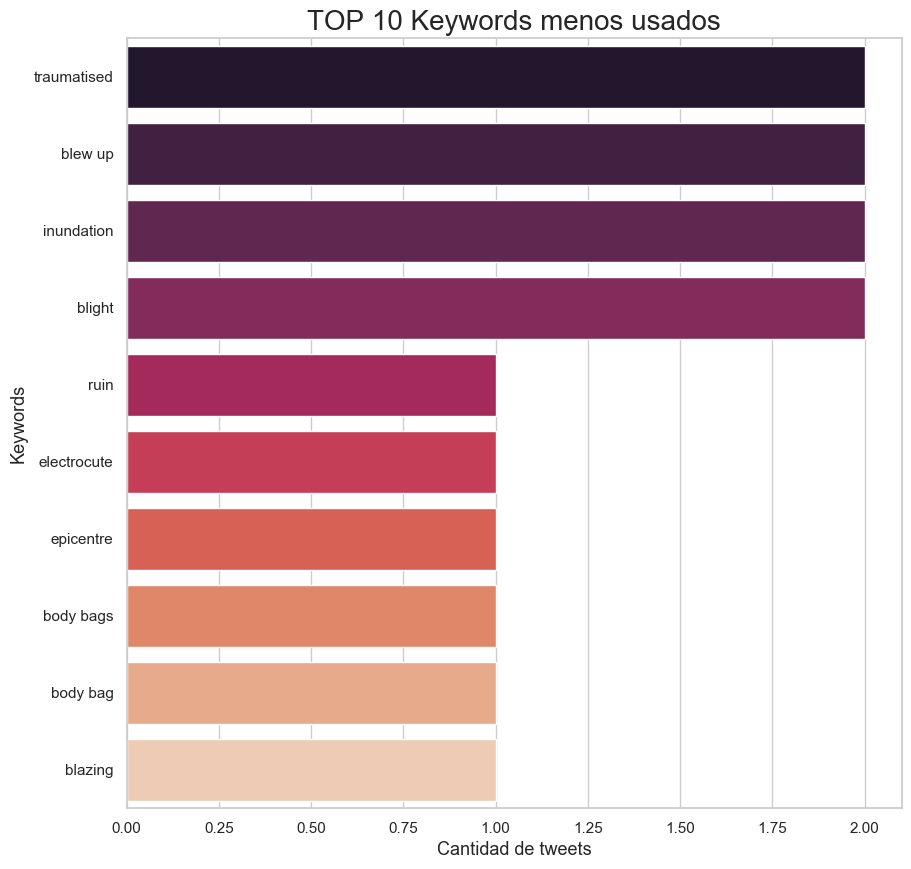

In [316]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=TOP_10_menos["cantidad"] , y=TOP_10_menos["keyword"] , orient='h',palette="rocket")
g.set_xlabel("Cantidad de tweets", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("TOP 10 Keywords menos usados", fontsize=20)

## KEYWORDS QUE TIENE MAS DESASTRES EN PORCENTAJE

#### Ahora partiendo de la idea de que ciertas Keywords suelen tener mayor porcentaje de ser tweets relacionados a desastres, se trato de buscar cuales son estos keywords para, a futuro, poder predecir con ayuda del keyword (si es que lo tiene), si un tweets realmente habla de un desatre en si o solo en un tweet muy exagerado(?)

In [317]:
C_Keyword_sort_by_porcentaje = C_grouped.sort_values(by ="% Disaster", ascending = False) 

#### Como punto de partida para tomar una keyword como candidata a ser mas desastres que no desastre, tomare que mas del 90% de los tweets en esa keyword debe ser desastre

In [318]:
C_Keyword_mayor_porcentaje = C_Keyword_sort_by_porcentaje[C_Keyword_sort_by_porcentaje["% Disaster"] > 90]

In [319]:
C_Keyword_mayor_porcentaje

,keyword,cantidad,Cant Disaster,% Disaster
220,wreckage,39,39,100.000000
63,debris,37,37,100.000000
71,derailment,39,39,100.000000
154,outbreak,40,39,97.500000
153,oil spill,38,37,97.368421
206,typhoon,38,37,97.368421
188,suicide bombing,33,32,96.969697
187,suicide bomber,31,30,96.774194
33,bombing,29,27,93.103448
186,suicide bomb,35,32,91.428571


Text(0.5, 1.0, 'Keywords que tiene mas desastres(en %)')

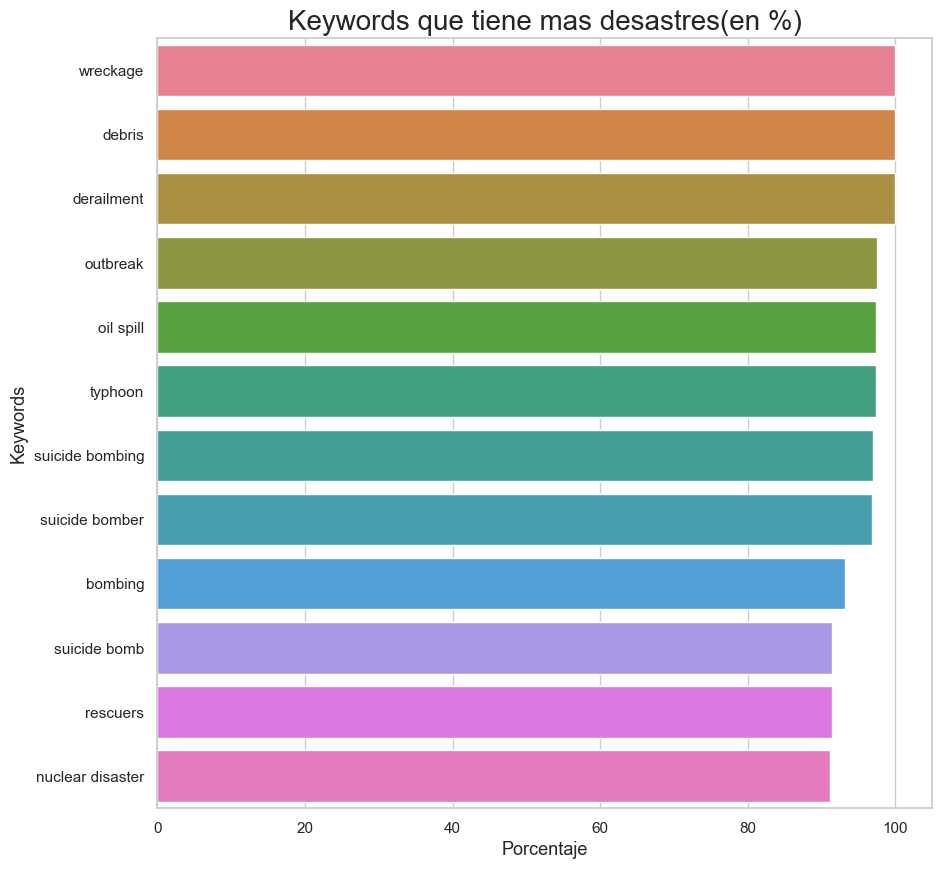

In [320]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=C_Keyword_mayor_porcentaje["% Disaster"] , y=C_Keyword_mayor_porcentaje["keyword"] , orient='h',palette='husl')
g.set_xlabel("Porcentaje", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("Keywords que tiene mas desastres(en %)", fontsize=20)


#### Como conclusion, con el set de datos que tenemos, se puede considerar a los tweets con KEYWORD "wreckage", "debris" y "derailment" como sospechosos (en el TP2) a ser Desastres reales, ya que su % de aciertos es del 100%. Mientras que a los demas del barplot tambien se los puede tomar como posibles desastres, pero con menor certeza.

#### De igual forma se realiza con los de menor porcentaje, tomando como tope si tiene un porcentaje menor al 10 en aciertos

In [321]:
C_Keyword_menor_porcentaje = C_Keyword_sort_by_porcentaje[C_Keyword_sort_by_porcentaje["% Disaster"] < 10]

In [322]:
C_Keyword_menor_porcentaje

,keyword,cantidad,Cant Disaster,% Disaster
120,harm,41,4,9.756098
84,drown,32,3,9.375000
184,stretcher,33,3,9.090909
49,collide,34,3,8.823529
181,smoke,34,3,8.823529
26,bloody,35,3,8.571429
95,epicentre,12,1,8.333333
156,panic,37,3,8.108108
99,explode,38,3,7.894737
221,wrecked,39,3,7.692308


Text(0.5, 1.0, 'Keywords que tiene menos desastres(en %)')

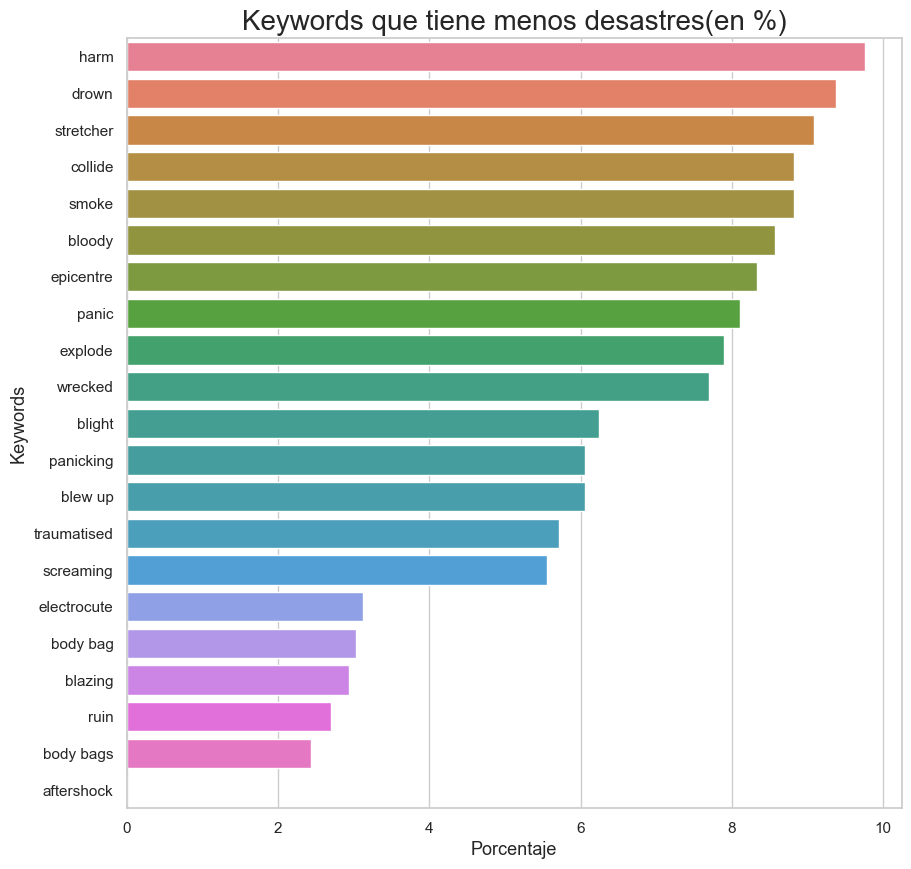

In [323]:
plt.rcParams['figure.figsize'] = (10, 10)
g = sns.barplot(x=C_Keyword_menor_porcentaje["% Disaster"] , y=C_Keyword_menor_porcentaje["keyword"] , orient='h',palette='husl')
g.set_xlabel("Porcentaje", fontsize=13)
g.set_ylabel("Keywords", fontsize=13,)
g.set_title("Keywords que tiene menos desastres(en %)", fontsize=20)

#### Aca, ya por tener un pequeño % de aciertos, todas las keywords no deberian ser tenidas en cuenta para predecir si es desastre (o por contraparte, tenerlas en cuenta si se quiere predecir cuales no son desatres, que es basicamente lo mismo, ya que busco un SI o NO). Aun menos si es "aftershock", el cual tiene un 0% de aciertos.

## Keyword NaN 

##### Al yo, haber cambiado nana por Nothing, trabajare con Nothing

In [324]:
C_Keyword_Nan = C_tweets[C_tweets["keyword"]=="Nothing"]
C_Keyword_Nan = C_Keyword_Nan.groupby(["target"]).agg({"text":"count"}) #Cuento cuantos textos ahi con 0 y 1
                                                                        #, lo mismo que cuanrtos 1 o 0 existen

In [325]:
C_Keyword_Nan = C_Keyword_Nan.rename(columns={"text":"cantidad"})
C_Keyword_Nan.reset_index(inplace=True)
C_Keyword_Nan["% target"] = C_Keyword_Nan["cantidad"] / C_Keyword_Nan["cantidad"].sum() *100

In [326]:
C_Keyword_Nan

,target,cantidad,% target
0,0,19,31.147541
1,1,42,68.852459


Text(0.5, 1.0, 'Porcentaje de desastres en Keyword NaN')

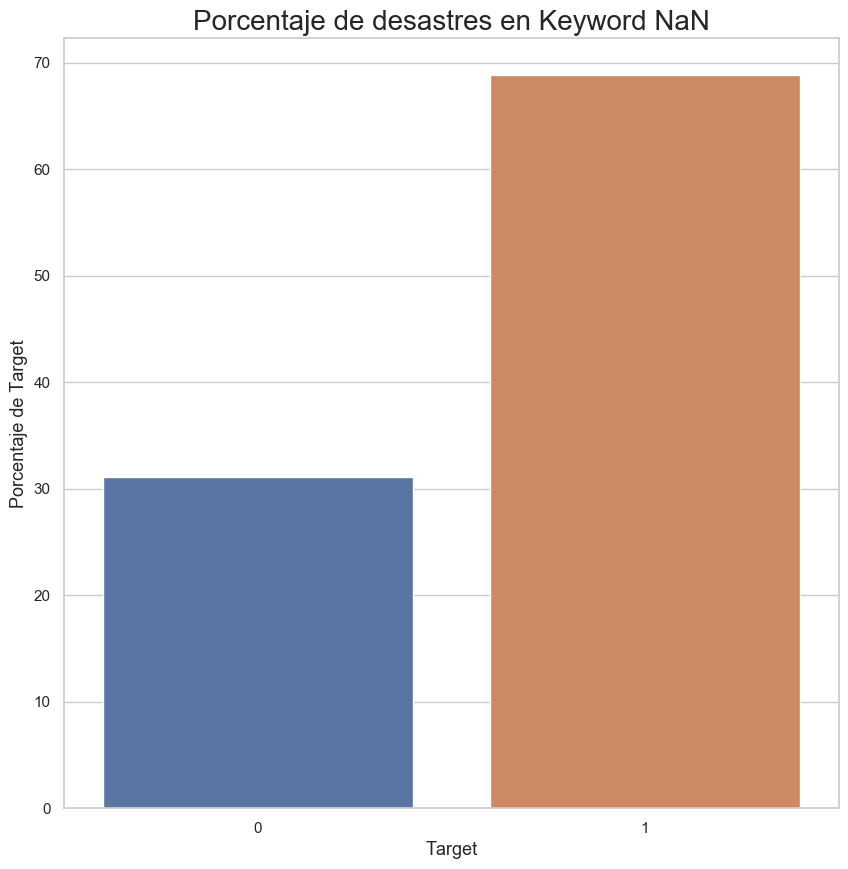

In [327]:
g = sns.barplot(x =C_Keyword_Nan["target"] , y=C_Keyword_Nan["% target"] , orient='v',)
g.set_ylabel("Porcentaje de Target", fontsize=13)
g.set_xlabel("Target", fontsize=13,)
g.set_title("Porcentaje de desastres en Keyword NaN", fontsize=20)